In [1]:
from utils import ModelImporter, Preprocessing
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pre = Preprocessing('fer2013')
train = pre.load_data(filename='train_norm.csv', name='train')

#### I have a very little amount of samples of class 1:Disgust, I am gonna duplicate that amount by flipping the images horizontally. Another common technique is to rotate, zoom in and crop but since my images are already so small, I will no do it

In [4]:
disgust = train.loc[train['emotion'] == 1]
disgust.head()

,0,1,2,3,4,5,6,7,8,9,...,2295,2296,2297,2298,2299,2300,2301,2302,2303,emotion
299,0.494118,0.494118,0.505882,0.470588,0.431373,0.658824,0.682353,0.674510,0.678431,0.682353,...,0.509804,0.415686,0.333333,0.301961,0.278431,0.235294,0.419608,0.780392,0.815686,1
388,0.349020,0.215686,0.094118,0.156863,0.168627,0.188235,0.207843,0.215686,0.231373,0.160784,...,0.388235,0.431373,0.478431,0.392157,0.266667,0.137255,0.090196,0.090196,0.070588,1
416,0.800000,0.764706,0.709804,0.513725,0.196078,0.196078,0.223529,0.219608,0.258824,0.384314,...,0.462745,0.447059,0.435294,0.470588,0.545098,0.560784,0.588235,0.611765,0.631373,1
473,0.054902,0.043137,0.050980,0.047059,0.160784,0.372549,0.443137,0.439216,0.435294,0.478431,...,0.274510,0.203922,0.121569,0.090196,0.137255,0.176471,0.176471,0.180392,0.188235,1
533,0.070588,0.098039,0.192157,0.294118,0.349020,0.380392,0.392157,0.392157,0.396078,0.403922,...,0.643137,0.647059,0.654902,0.658824,0.658824,0.639216,0.619608,0.329412,0.054902,1


In [5]:
len(disgust)

436

In [6]:
from image_utils import ImageConverter
import matplotlib.pyplot as plt

In [7]:
array_0 = disgust.drop(columns = ['emotion']).values[0]

In [8]:
img_conv = ImageConverter()

In [10]:
array_0_frame = img_conv.reshape_array_to_frame(array_0)

In [11]:
array_0_frame_flipped = img_conv.flip_frame_horitzontally(array_0_frame)

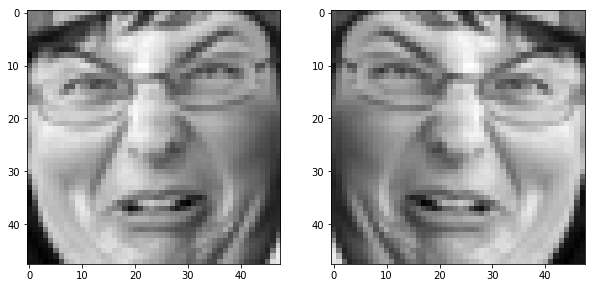

In [14]:
plt.figure(1, figsize=(10, 5))
plt.subplot(1,2, 1)
plt.imshow(array_0_frame, cmap='gray', interpolation='none')
plt.subplot(1,2, 2)
plt.imshow(array_0_frame_flipped, cmap='gray', interpolation='none')
plt.show()

In [23]:
train_only_disgust_np = disgust.drop(columns = ['emotion']).values

In [60]:
train_only_disgust_np

array([[0.49411765, 0.49411765, 0.50588235, ..., 0.41960784, 0.78039216,
        0.81568627],
       [0.34901961, 0.21568627, 0.09411765, ..., 0.09019608, 0.09019608,
        0.07058824],
       [0.8       , 0.76470588, 0.70980392, ..., 0.58823529, 0.61176471,
        0.63137255],
       ...,
       [0.00784314, 0.        , 0.33333333, ..., 0.        , 0.00392157,
        0.05098039],
       [0.08627451, 0.07843137, 0.07058824, ..., 0.21176471, 0.21176471,
        0.21176471],
       [0.89411765, 0.67843137, 0.6       , ..., 0.37647059, 0.42352941,
        0.50196078]])

In [71]:
flipped_train_only_disgust = np.zeros(shape=train_only_disgust_np.shape)
for i in range(len(train_only_disgust_np)):
    flipped_np = img_conv.flip_frame_horitzontally(img_conv.reshape_array_to_frame(train_only_disgust_np[i]))
    flipped_train_only_disgust[i] = img_conv.reshape_frame_to_array(flipped_np)

In [72]:
flipped_train_only_disgust

array([[0.38431373, 0.33333333, 0.34901961, ..., 0.16078431, 0.17647059,
        0.17647059],
       [0.28627451, 0.28235294, 0.3254902 , ..., 0.15294118, 0.21176471,
        0.22352941],
       [0.31372549, 0.28235294, 0.24705882, ..., 0.80784314, 0.81568627,
        0.81960784],
       ...,
       [0.28235294, 0.23137255, 0.29803922, ..., 0.        , 0.        ,
        0.        ],
       [0.0745098 , 0.08627451, 0.09411765, ..., 0.41176471, 0.40784314,
        0.40784314],
       [0.48235294, 0.5254902 , 0.49411765, ..., 1.        , 1.        ,
        1.        ]])

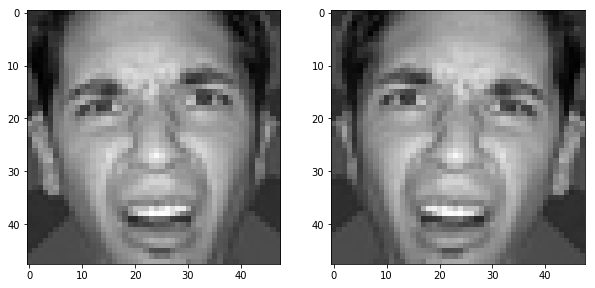

In [77]:
plt.figure(1, figsize=(10, 5))
plt.subplot(1,2, 1)
plt.imshow(img_conv.reshape_array_to_frame(train_only_disgust_np[400]), cmap='gray', interpolation='none')
plt.subplot(1,2, 2)
plt.imshow(img_conv.reshape_array_to_frame(flipped_train_only_disgust[400]), cmap='gray', interpolation='none')
plt.show()

In [75]:
#Seems to work, going to save the data

In [81]:
new_disgust_df = pd.DataFrame(flipped_train_only_disgust)
new_disgust_df['emotion'] = 1
new_disgust_df.tail()

,0,1,2,3,4,5,6,7,8,9,...,2295,2296,2297,2298,2299,2300,2301,2302,2303,emotion
431,0.121569,0.200000,0.270588,0.407843,0.576471,0.666667,0.709804,0.772549,0.800000,0.803922,...,0.611765,0.690196,0.741176,0.752941,0.752941,0.776471,0.784314,0.800000,0.788235,1
432,0.388235,0.388235,0.419608,0.517647,0.611765,0.631373,0.603922,0.588235,0.576471,0.560784,...,0.917647,0.917647,0.921569,0.921569,0.929412,0.933333,0.933333,0.937255,0.941176,1
433,0.282353,0.231373,0.298039,0.239216,0.596078,0.666667,0.713725,0.839216,0.878431,0.890196,...,0.007843,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
434,0.074510,0.086275,0.094118,0.098039,0.098039,0.101961,0.101961,0.101961,0.109804,0.121569,...,0.372549,0.388235,0.396078,0.403922,0.403922,0.403922,0.411765,0.407843,0.407843,1
435,0.482353,0.525490,0.494118,0.521569,0.568627,0.501961,0.490196,0.486275,0.470588,0.494118,...,0.976471,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1


In [95]:
new_disgust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436 entries, 0 to 435
Columns: 2305 entries, 0 to emotion
dtypes: float64(2304), int64(1)
memory usage: 7.7 MB


In [93]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28709 entries, 0 to 28708
Columns: 2305 entries, 0 to emotion
dtypes: float64(2304), int64(1)
memory usage: 504.9 MB


In [107]:
new_disgust_df.columns = train.columns 

In [108]:
train_expanded_disgust_only = pd.concat([train, new_disgust_df], axis = 0)

In [110]:
train_expanded_disgust_only.head()

,0,1,2,3,4,5,6,7,8,9,...,2295,2296,2297,2298,2299,2300,2301,2302,2303,emotion
0,0.274510,0.313725,0.321569,0.282353,0.227451,0.227451,0.235294,0.247059,0.211765,0.227451,...,0.713725,0.717647,0.533333,0.415686,0.454902,0.372549,0.415686,0.427451,0.321569,0
1,0.592157,0.588235,0.576471,0.607843,0.580392,0.521569,0.435294,0.549020,0.666667,0.682353,...,0.423529,0.372549,0.423529,0.400000,0.262745,0.670588,0.756863,0.717647,0.721569,0
2,0.905882,0.831373,0.611765,0.643137,0.682353,0.541176,0.631373,0.678431,0.713725,0.784314,...,0.541176,0.596078,0.478431,0.447059,0.396078,0.380392,0.345098,0.431373,0.596078,2
3,0.094118,0.125490,0.141176,0.117647,0.125490,0.090196,0.074510,0.078431,0.117647,0.160784,...,0.494118,0.517647,0.517647,0.521569,0.533333,0.545098,0.556863,0.560784,0.556863,4
4,0.015686,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.133333,0.121569,0.121569,0.121569,0.105882,0.121569,0.117647,0.113725,0.117647,6


In [111]:
pre.set(name='train_expanded_disgust', value=train_expanded_disgust_only)
pre.save(name= 'train_expanded_disgust')